In [673]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [674]:
data = importpbdatapandas(0)
print (data)

        pt    eta    phi  charge
0    1.094 -0.085 -3.055       1
1    1.418  1.417 -3.025       1
2    1.438 -1.569 -2.996       1
3    1.132 -1.061 -2.986       1
4    2.352 -0.350 -2.867       1
..     ...    ...    ...     ...
239  1.557 -1.594  2.463      -1
240  1.287 -2.282 -1.011      -1
241  0.917  2.180  1.562      -1
242  1.124  2.316 -0.952      -1
243  3.304  2.127 -0.447       1

[244 rows x 4 columns]


In [675]:
phi = data[data.columns[2]]
dphi = np.diff(phi)

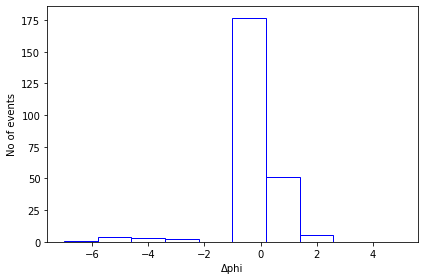

In [676]:
nbins = 10
xmin = -7
xmax = 5
plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δphi')
plt.tight_layout()  
plt.show()

[  1.   4.   3.   2.   0. 177.  51.   5.   0.   0.] [-7.  -5.8 -4.6 -3.4 -2.2 -1.   0.2  1.4  2.6  3.8  5. ] <BarContainer object of 10 artists>


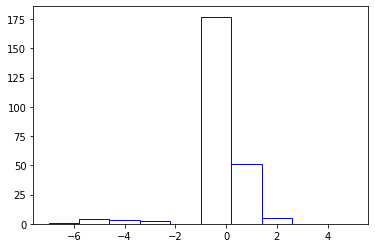

In [677]:
counts, bins, bars= plt.hist(dphi,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
print (counts, bins, bars)

In [678]:
zphi = ('1,   4,   3,   2,   0, 177,  51,   5,   0,   0')

In [679]:
eta = data[data.columns[1]]
deta = np.diff(eta)

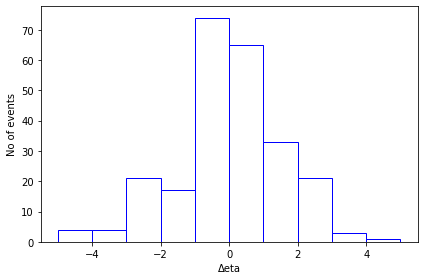

In [680]:
nbins = 10
xmin = -5
xmax = 5
plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
plt.ylabel(r'No of events')
plt.xlabel(r'Δeta')
plt.tight_layout()  
plt.show()

[ 4.  4. 21. 17. 74. 65. 33. 21.  3.  1.] [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.] <BarContainer object of 10 artists>


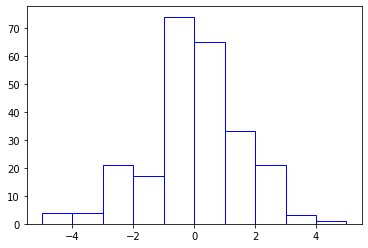

In [681]:
counts, bins, bars2 = plt.hist(deta,nbins,color="white", edgecolor="blue",range = [xmin,xmax])
print (counts, bins, bars2)

In [682]:
zeta = ('4,  4, 21, 17, 74, 65, 33, 21,  3,  1')

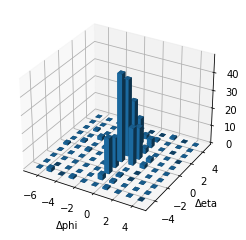

In [683]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = dphi
y = deta
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[-7, 5], [-5, 5]])


xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.xlabel(r'Δphi', fontsize = 10)
plt.ylabel(r'Δeta', fontsize = 10)
plt.show()

AttributeError: 'tuple' object has no attribute 'ndim'

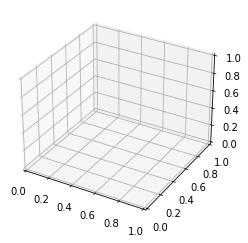

In [684]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = [dphi]
Y = [deta]
X, Y = np.meshgrid(X, Y)
Z = (zphi,zeta)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0,500)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()